# Sheet 5

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

# 2) Phase classification in $\phi^4$ theory

(a)

In [4]:
train_data = np.load("data05/lattice_train.npy")
test_data = np.load("data05/lattice_test.npy")
kappa = np.arange(0.24, 0.30, 0.0025)

L = 16
lattice_shape = (L,L)

train, test = torch.tensor(train_data), torch.tensor(test_data)
symmetric_phase_data, broken_phase_data = train[0,...], train[1,...]
training_datas = torch.cat((symmetric_phase_data,broken_phase_data), dim=0)
training_labels = torch.cat((torch.zeros(symmetric_phase_data.shape[0]),torch.ones(broken_phase_data.shape[0])), dim=0)

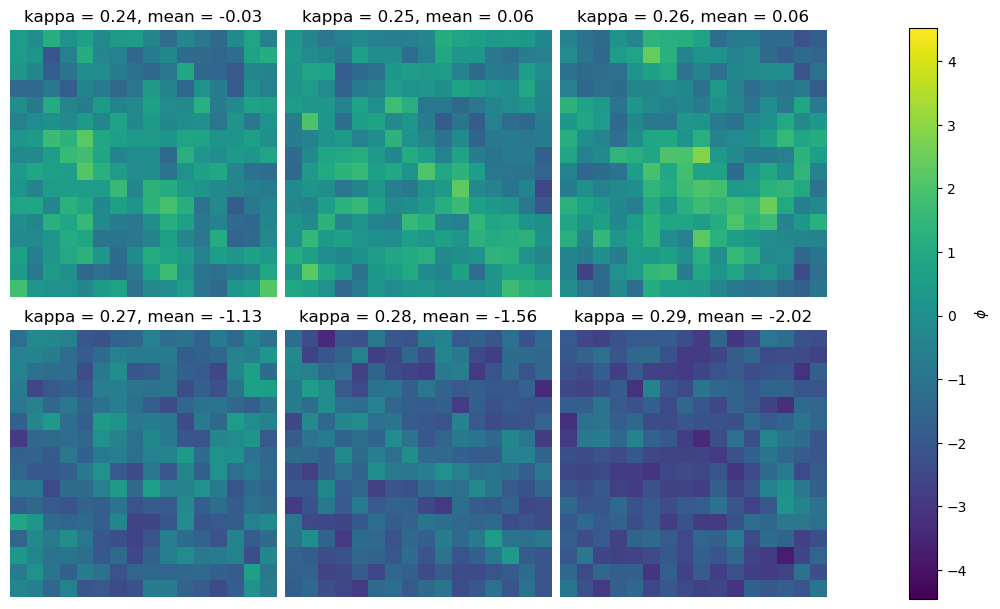

In [5]:
# TODO: Visualize lattice sides for different values of kappa
# visaulize lattices for different kappas
np.random.seed(4)
kappas_to_visualize = np.array([0.24, 0.25, 0.26, 0.27, 0.28, 0.29])
fig, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)
norm = plt.Normalize(vmin=np.min(train_data), vmax=np.max(train_data))
i = 0
for kappa, dataset in zip(kappa, test_data):
    if np.round(kappa, 4) in kappas_to_visualize:
        index = np.random.randint(0, 100) # Pick random example
        ax = axes[i // 3, i % 3]
        i += 1
        im = ax.imshow(dataset[index], norm=norm, cmap='viridis')
        ax.set_title(f'kappa = {np.round(kappa, 2)}, mean = {np.mean(dataset[index]):.2f}')
        ax.axis('off')
cbar = fig.colorbar(im, ax=axes, orientation='vertical', pad=0.1)
cbar.set_label('$\phi$')
plt.show()

(b)

In [6]:
# TODO: Design a CNN
class CNN(torch.nn.Module):
    def __init__(self):
# call parent constructor
        super(CNN,self).__init__()
        # define layers
        self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 8,kernel_size = 3)
        self.ReLU1 = torch.nn.ReLU()
        self.conv2 = torch.nn.Conv2d(in_channels = 8, out_channels = 8,kernel_size = 3)
        self.ReLU2 = torch.nn.ReLU()
        self.Linear = torch.nn.Linear(in_features = 8*14*14, out_features = 1)
        self.Sigmoid = torch.nn.Sigmoid() # since output should be between 0␣and 1
# define forward pass
    def forward(self, x):
        x = torch.nn.functional.pad(x, (1, 1, 1, 1), mode='circular')
        x = self.conv1(x)
        x = self.ReLU1(x)
        x = self.conv2(x)
        x = self.ReLU2(x)
        x = x.view(x.size(0), -1) # Flatten
        x = self.Linear(x)
        x = self.Sigmoid(x)
        return x

In [9]:
training_datas.dtype

torch.float32

(c)

In [8]:
# TODO: Train CNN
model=CNN()
loss_func= nn.BCELoss()
optimizer=torch.optim.AdamW(model.parameters(), lr=0.001)
# create dataloader
size_of_batch = 64

training_data_tensor = torch.utils.data.TensorDataset(training_datas,training_labels)
train_loader=torch.utils.data.DataLoader(training_data_tensor,batch_size=64,shuffle=True)

In [19]:
for epoch in range(500):
    for inputs, targets in train_loader:
        print(targets.shape)
        optimizer.zero_grad()  # Zurücksetzen der Gradienten
        outputs = model(inputs.unsqueeze(1))  # Vorwärtsdurchlauf
        loss = loss_func(outputs, targets.unsqueeze(1))  # Berechnung des Verlusts
        loss.backward()  # Rückwärtsdurchlauf und Berechnung der Gradienten
        optimizer.step()  # Aktualisierung der Gewichte


torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([16])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64

(d)

In [17]:
# TODO: Evaluate CNN

In [4]:
# TODO: Plot means and stds

# 3) Uncertainties in Amplitude Regression

In [2]:
# download data to folder data04
# this might take some time (50MB)
# you can also do this manually (download + unpack zip)
import os, sys
import wget
from zipfile import ZipFile
from tqdm import tqdm

DESTINATION = "data04"
url = "https://www.thphys.uni-heidelberg.de/~plehn/pics/"
filename = "tutorial-2-data.zip"
url = url + filename

os.makedirs(DESTINATION, exist_ok=True)
os.chdir(DESTINATION)
wget.download(url, filename)
with ZipFile(filename, "r") as zip_ref:
    for file in tqdm(iterable=zip_ref.namelist(), total=len(zip_ref.namelist())):
        zip_ref.extract(member=file)
%ls
os.chdir("..")

100%|██████████| 11/11 [00:00<00:00, 49.16it/s]


 Volume in Laufwerk C: hat keine Bezeichnung.
 Volumeseriennummer: DE2C-D233

 Verzeichnis von c:\Users\Games\Desktop\mlph2023-Exercises\data04

01.12.2023  13:18    <DIR>          .
01.12.2023  10:45    <DIR>          ..
01.12.2023  10:40    <DIR>          tutorial-2-data
01.12.2023  10:40        55.093.854 tutorial-2-data (1).zip
01.12.2023  10:40        55.093.854 tutorial-2-data (2).zip
01.12.2023  10:40        55.093.854 tutorial-2-data (3).zip
01.12.2023  10:59        55.093.854 tutorial-2-data (4).zip
01.12.2023  11:23        55.093.854 tutorial-2-data (5).zip
01.12.2023  11:34        55.093.854 tutorial-2-data (6).zip
01.12.2023  12:06        55.093.854 tutorial-2-data (7).zip
01.12.2023  13:18        55.093.854 tutorial-2-data (8).zip
01.12.2023  10:40        55.093.854 tutorial-2-data.zip
               9 Datei(en),    495.844.686 Bytes
               3 Verzeichnis(se), 491.214.417.920 Bytes frei


In [3]:
# load data
trn_dat = np.load("data04/tutorial-2-data/trn_dat.npy")
trn_amp = np.load("data04/tutorial-2-data/trn_amp.npy")

val_dat = np.load("data04/tutorial-2-data/val_dat.npy")
val_amp = np.load("data04/tutorial-2-data/val_amp.npy")

tst_dat = np.load("data04/tutorial-2-data/tst_dat.npy")
tst_amp = np.load("data04/tutorial-2-data/tst_amp.npy")

print(f"train data shape: {trn_dat.shape}")
print(f"train amp  shape: {trn_amp.shape}")
print(f"test  data shape: {tst_dat.shape}")
print(f"test  amp  shape: {tst_amp.shape}")
print(f"val   data shape: {val_dat.shape}")
print(f"val   amp  shape: {val_amp.shape}")

train data shape: (30000, 5, 4)
train amp  shape: (30000,)
test  data shape: (30000, 5, 4)
test  amp  shape: (30000,)
val   data shape: (30000, 5, 4)
val   amp  shape: (30000,)


In [4]:
# flatten datasets
nev = trn_dat.shape[0]
trn_datf = np.reshape(trn_dat, (nev, -1))
val_datf = np.reshape(val_dat, (nev, -1))
tst_datf = np.reshape(tst_dat, (nev, -1))
def preprocess_x(x_in, mean=None, std=None):
    x = x_in.copy() # do not overwrite
    if mean is None or std is None:
        mean = x.mean(keepdims=True)
        std = x.std(keepdims=True)
    x = (x - mean) / std # standardize
    assert np.isfinite(x).all() # check for nans and infs
    return torch.Tensor(x).float(), mean, std # create torch tensors
    
def preprocess_A(A_in, mean=None, std=None):
    A = A_in.copy()
    A = np.log(A)
    if mean is None or std is None:
        mean = A.mean(keepdims=True)
        std = A.std(keepdims=True)
    A = (A - mean) / std
    assert np.isfinite(A).all() 
    return torch.tensor(A).float().unsqueeze(-1), mean, std

def undo_preprocess_A(A_in, mean, std):
    A = A_in.copy()
    A = A * std + mean
    A = np.exp(A)
    return A
class amp_dataset(torch.utils.data.Dataset):
    
    def __init__(self, data, amp):
        self.data = data
        self.amp = amp

    def __len__(self):
        return len(self.amp)

    def __getitem__(self, idx):
        return self.data[idx], self.amp[idx]
    # create datasets and dataloaders
trn_datfp, mean_x, std_x = preprocess_x(trn_datf)
val_datfp, _, _ = preprocess_x(val_datf, mean_x, std_x)
tst_datfp, _, _ = preprocess_x(tst_datf, mean_x, std_x)

trn_ampp, mean_A, std_A = preprocess_A(trn_amp)
val_ampp, _, _ = preprocess_A(val_amp, mean_A, std_A)
tst_ampp, _, _ = preprocess_A(tst_amp, mean_A, std_A)

trn_dataset = amp_dataset(trn_datfp, trn_ampp)
val_dataset = amp_dataset(val_datfp, val_ampp)
tst_dataset = amp_dataset(tst_datfp, tst_ampp)

batch_size = 64
trn_dataloader = torch.utils.data.DataLoader(trn_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
tst_dataloader = torch.utils.data.DataLoader(tst_dataset, batch_size=batch_size, shuffle=False)

(a) 

In [5]:
# TODO: Recycle code from last sheet
class amp_net(nn.Module):
    
    def __init__(self, hdn_dim=32, ipt_dim=20, opt_dim=1, n_layers=2):
        super(amp_net, self).__init__()
        
        assert n_layers>=2
        
        layers = []
        layers.append(nn.Linear(ipt_dim, hdn_dim))
        layers.append(nn.ReLU())
        for _ in range(n_layers-2):
            layers.append(nn.Linear(hdn_dim, hdn_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hdn_dim, opt_dim))
        
        self.linear_relu_stack = nn.Sequential(*layers)

    def forward(self, x):
        out = self.linear_relu_stack(x)
        return out
def batch_loss(model, x, y):
    x, y = x.to(device), y.to(device)
    pred = model(x)
    loss = loss_fn(pred, y)
    return loss
def train_epoch(model, dataloader, losses, batch_loss_fn):
    #iterator = iter(dataloader)
    #for i in range(len(dataloader)):
    for x, y in dataloader:
        #x, y = next(iterator)
        optimizer.zero_grad()
        
        loss = batch_loss_fn(model, x, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses
def val_epoch(model, dataloader, losses, batch_loss_fn):
    losses_epoch = []
    with torch.no_grad():
        for x, y in dataloader:
            loss = batch_loss_fn(model, x,y)
            losses_epoch.append(loss.item())
    losses.append(np.mean(losses_epoch))
    return losses

In [11]:
# TODO: Train ensemble of deterministic networks
import torch
import torch.nn as nn
from torch.optim import Adam

networks = {}
n_models = 10
n_epochs = 100


for i in range(n_models):
    torch.manual_seed(i)
    model = amp_net(n_layers=4)  # Create a new model
    optimizer = Adam(model.parameters(), lr=1e-3)  # Create a new optimizer for each model
    loss_fn = nn.MSELoss()
    
    for epoch in range(n_epochs):
        for x, y in trn_dataloader:
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_fn(outputs, y)
            loss.backward()
            optimizer.step()
    
    networks["Network"+str(i)]=model+str(i)  # Append the trained model to the list
    print(i)

    


SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (4164057512.py, line 13)

In [66]:
# TODO: Evaluate ensemble -> List of predictions for log A
# result: array preds of shape (10, 30000)
preds_list = []

for i in range(10):
    model = networks["Network" + str(i)]
    for x, y in tst_dataloader:
        predictions = model(x).detach().numpy()
        preds_list.extend(predictions)
preds = np.array(preds_list)
preds_array = np.array(preds_list)
# Reshape the array to have a shape of (10, 30,000)
preds_reshaped = preds_array.reshape(10, -1)  # -1 infers the missing dimension based on other dimensions

preds=preds_reshaped

In [69]:
preds

array([[-1.6216922 , -0.16389936, -0.00632642, ..., -0.50597   ,
         0.68953615,  0.7109824 ],
       [-1.6033485 , -0.14655124,  0.06281969, ..., -0.38387805,
         0.55988723,  0.76647025],
       [-1.692953  , -0.23462269,  0.02896509, ..., -0.50901556,
         0.65879226,  0.8095447 ],
       ...,
       [-1.6650394 , -0.09336921,  0.11777405, ..., -0.4303316 ,
         0.60140467,  0.8480577 ],
       [-1.5798789 , -0.13185297,  0.06681789, ..., -0.41829944,
         0.5888579 ,  0.7543794 ],
       [-1.6405056 , -0.09001423,  0.04343531, ..., -0.26490536,
         0.6093511 ,  0.6882668 ]], dtype=float32)

In [73]:
preds

array([[-1.6216922 , -0.16389936, -0.00632642, ..., -0.50597   ,
         0.68953615,  0.7109824 ],
       [-1.6033485 , -0.14655124,  0.06281969, ..., -0.38387805,
         0.55988723,  0.76647025],
       [-1.692953  , -0.23462269,  0.02896509, ..., -0.50901556,
         0.65879226,  0.8095447 ],
       ...,
       [-1.6650394 , -0.09336921,  0.11777405, ..., -0.4303316 ,
         0.60140467,  0.8480577 ],
       [-1.5798789 , -0.13185297,  0.06681789, ..., -0.41829944,
         0.5888579 ,  0.7543794 ],
       [-1.6405056 , -0.09001423,  0.04343531, ..., -0.26490536,
         0.6093511 ,  0.6882668 ]], dtype=float32)

C:\Users\Games\AppData\Local\Temp\ipykernel_8180\3714063830.py:3: RuntimeWarning: invalid value encountered in log
  preds_means = np.mean(np.log(preds), axis=0)
C:\Users\Games\AppData\Local\Temp\ipykernel_8180\3714063830.py:4: RuntimeWarning: invalid value encountered in log
  preds_stds = np.std(np.log(preds), axis=0)


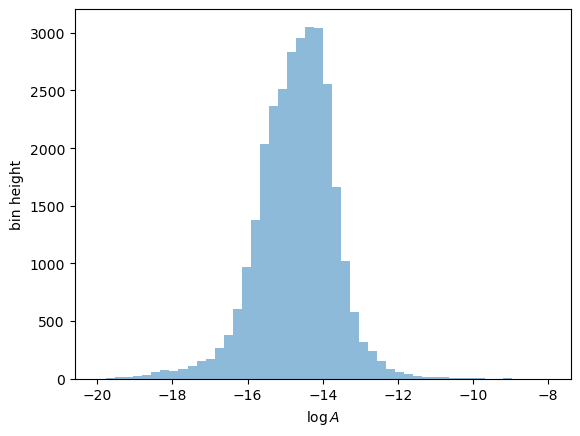

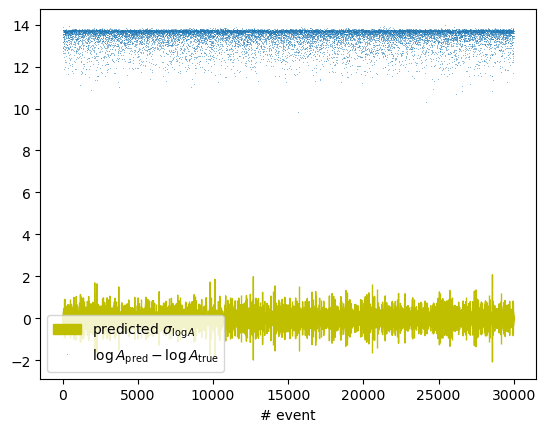

In [67]:
# uncertainties at event level

preds_means = np.mean(np.log(preds), axis=0)
preds_stds = np.std(np.log(preds), axis=0)

plt.hist(np.log(tst_amp), range=(-20, -8), bins=50, alpha=.5)
plt.hist(preds_means, range=(-20, -8), bins=50, alpha=.5)
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.show()

x = range(len(tst_amp))
plt.fill_between(x, preds_stds, -preds_stds, color="y", label=r"predicted $\sigma_{\log A}$")
plt.plot(x, preds_means - np.log(tst_amp), ",", alpha=.5, ms=.1, label=r"$\log A_\mathrm{pred}-\log A_\mathrm{true}$")
plt.xlabel("# event")
#plt.ylim(-1,1)
plt.legend()
plt.show()

# TODO: Interpret results

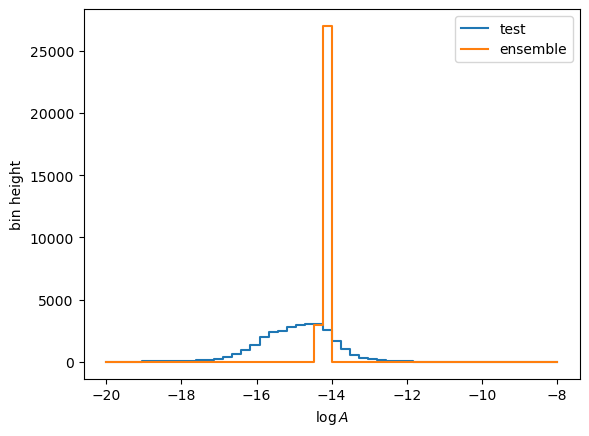

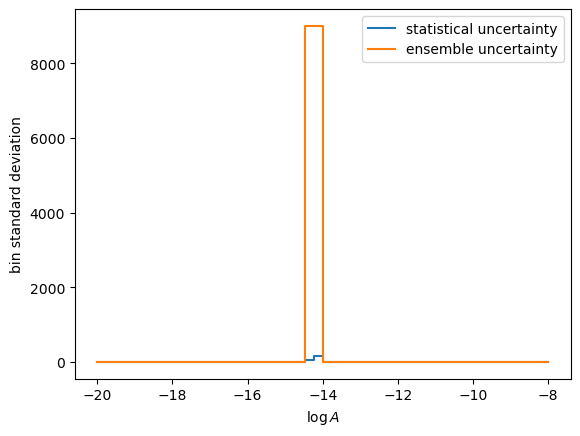

C:\Users\Games\AppData\Local\Temp\ipykernel_8180\644867550.py:38: RuntimeWarning: invalid value encountered in divide
  ratio = (y * scale) / (hists[0] * scales[0])
C:\Users\Games\AppData\Local\Temp\ipykernel_8180\644867550.py:39: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt( (y_err/y)**2 + (hist_errors[0] / hists[0])**2)


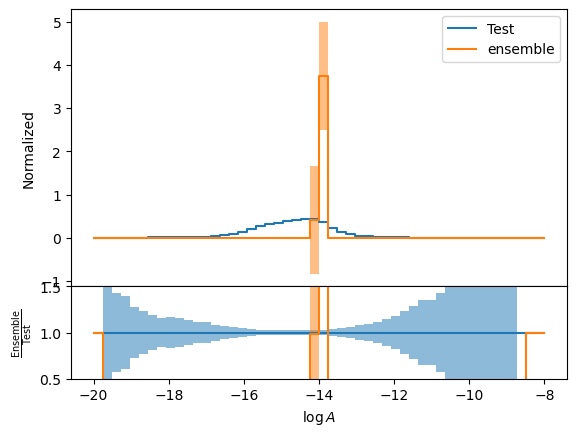

In [37]:
# uncertainties at histogram level

hist_test, bins = np.histogram(np.log(tst_amp), range=(-20,-8), bins=50)
hist_data = np.array([np.histogram(np.log(preds[i,:]), bins=bins)[0] for i in range(n_models)])
hist_means = np.mean(hist_data, axis=0)
hist_stds = np.std(hist_data, axis=0)

# means
dup_last = lambda a: np.append(a, a[-1])
plt.step(bins, dup_last(hist_test), label="test")
plt.step(bins, dup_last(hist_means), label="ensemble")
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.legend()
plt.show()

# standard deviations
plt.step(bins, dup_last(np.sqrt(hist_means)), label="statistical uncertainty")
plt.step(bins, dup_last(hist_stds), label="ensemble uncertainty")
plt.xlabel(r"$\log A$")
plt.ylabel("bin standard deviation")
plt.legend()
plt.show()

# means + standard deviations
hists = [hist_test, hist_means]
hist_errors = [np.sqrt(hist_test), hist_stds]
integrals = [np.sum((bins[1:] - bins[:-1])*y) for y in hists]
scales = [1 / integral if integral != 0. else 1. for integral in integrals]

label = ["Test", "ensemble"]
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": [3, 1], "hspace": 0.})
for y, y_err, scale, label in zip(hists, hist_errors, scales, label):
    axs[0].step(bins, dup_last(y) * scale, label=label, where="post")
    axs[0].fill_between(bins, dup_last(y + y_err) * scale, 
                     dup_last(y - y_err) * scale, alpha=.5, step="post")
    
    ratio = (y * scale) / (hists[0] * scales[0])
    ratio_err = np.sqrt( (y_err/y)**2 + (hist_errors[0] / hists[0])**2)
    ratio[np.isnan(ratio)] = 1.
    ratio_err[np.isnan(ratio)] = 0.
    
    axs[1].step(bins, dup_last(ratio), where="post")
    axs[1].fill_between(bins, dup_last(ratio + ratio_err), dup_last(ratio - ratio_err), step="post", alpha=.5)
axs[1].set_xlabel(r"$\log A$")
axs[0].set_ylabel("Normalized")
axs[1].set_ylabel(r"$\frac{\mathrm{Ensemble}}{\mathrm{Test}}$")
axs[1].set_ylim(.5, 1.5)
axs[0].legend()
plt.show()

# TODO: Interpret results

(d)

In [16]:
# TODO: Fill in expression for KL divergence
import math

class VBLinear(nn.Module):
    # VB = variational bayes
    def __init__(self, in_features, out_features, prior_prec=1.0, _map=False, std_init=-5):
        super(VBLinear, self).__init__()
        self.n_in = in_features
        self.n_out = out_features
        self.map = _map
        self.prior_prec = prior_prec # = 1/sigma_prior**2
        self.random = None
        self.bias = nn.Parameter(torch.Tensor(out_features))
        self.mu_w = nn.Parameter(torch.Tensor(out_features, in_features))
        self.logsig2_w = nn.Parameter(torch.Tensor(out_features, in_features)) # log(sigma_network**2)
        self.std_init = std_init
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.mu_w.size(1))
        self.mu_w.data.normal_(0, stdv)
        self.logsig2_w.data.zero_().normal_(self.std_init, 0.001)
        self.bias.data.zero_()

    def KL(self):
        logsig2_w = self.logsig2_w.clamp(-11, 11)
        kl = None # KL divergence of variational bayes linear layer 
        return kl

    def forward(self, input):
        if self.training:
            # local reparameterization trick is more efficient and leads to
            # an estimate of the gradient with smaller variance.
            # https://arxiv.org/pdf/1506.02557.pdf
            mu_out = nn.functional.linear(input, self.mu_w, self.bias)
            logsig2_w = self.logsig2_w.clamp(-11, 11)
            s2_w = logsig2_w.exp()
            var_out = nn.functional.linear(input.pow(2), s2_w) + 1e-8
            return mu_out + var_out.sqrt() * torch.randn_like(mu_out)

        else:
            if self.map: # just return the mean, no sampling
                return nn.functional.linear(input, self.mu_w, self.bias)

            logsig2_w = self.logsig2_w.clamp(-11, 11)
            if self.random is None:
                self.random = torch.randn_like(self.logsig2_w)
            s2_w = logsig2_w.exp()
            weight = self.mu_w + s2_w.sqrt() * self.random
            return nn.functional.linear(input, weight, self.bias) + 1e-8

In [17]:
# TODO: Create BNN (like deterministic network, but with bayesian layers)

class bayesian_amp_net(nn.Module):
    
    def __init__(self, training_size, ipt_dim=20, opt_dim=1, hdn_dim=32, n_layers=2):
        pass

    def forward(self, x):
        pass
    
    def KL(self):
        kl = 0
        for layer in self.bayesian_layers:
            kl += layer.KL()
        return kl
    
    def reset_BNN(self):
        for layer in self.bayesian_layers:
            layer.random = None

In [8]:
def batch_loss_bayesian(model, x, y):
    x, y = x.to(device), y.to(device)
    pred = model(x)
    loss = loss_fn(pred, y)
    kl = model.KL() / trn_dat.shape[0] # correct normalization!
    loss += kl
    return loss

In [9]:
# TODO: Train BNN

(e)

In [21]:
# TODO: Evaluate BNN

In [10]:
# uncertainties at event level

preds_means = np.mean(np.log(preds), axis=0)
preds_stds = np.std(np.log(preds), axis=0)

plt.hist(np.log(tst_amp), range=(-20, -8), bins=50, alpha=.5)
plt.hist(preds_means, range=(-20, -8), bins=50, alpha=.5)
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.show()

x = range(len(tst_amp))
plt.fill_between(x, preds_stds, -preds_stds, color="y", label=r"predicted $\sigma_{\log A}$")
plt.plot(x, preds_means - np.log(tst_amp), ",", alpha=.5, ms=.1, label=r"$\log A_\mathrm{pred}-\log A_\mathrm{true}$")
plt.xlabel("# event")
plt.ylim(-1,1)
plt.legend()
plt.show()

# TODO: Interpret results

In [11]:
# uncertainties at histogram level

hist_test, bins = np.histogram(np.log(tst_amp), range=(-20,-8), bins=50)
hist_data = np.array([np.histogram(np.log(preds[i,:]), bins=bins)[0] for i in range(n_models)])
hist_means = np.mean(hist_data, axis=0)
hist_stds = np.std(hist_data, axis=0)

# means
dup_last = lambda a: np.append(a, a[-1])
plt.step(bins, dup_last(hist_test), label="test")
plt.step(bins, dup_last(hist_means), label="ensemble")
plt.xlabel(r"$\log A$")
plt.ylabel("bin height")
plt.legend()
plt.show()

# standard deviations
plt.step(bins, dup_last(np.sqrt(hist_means)), label="statistical uncertainty")
plt.step(bins, dup_last(hist_stds), label="ensemble uncertainty")
plt.xlabel(r"$\log A$")
plt.ylabel("bin standard deviation")
plt.legend()
plt.show()

# means + standard deviations
hists = [hist_test, hist_means]
hist_errors = [np.sqrt(hist_test), hist_stds]
integrals = [np.sum((bins[1:] - bins[:-1])*y) for y in hists]
scales = [1 / integral if integral != 0. else 1. for integral in integrals]

label = ["Test", "ensemble"]
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": [3, 1], "hspace": 0.})
for y, y_err, scale, label in zip(hists, hist_errors, scales, label):
    axs[0].step(bins, dup_last(y) * scale, label=label, where="post")
    axs[0].fill_between(bins, dup_last(y + y_err) * scale, 
                     dup_last(y - y_err) * scale, alpha=.5, step="post")
    
    ratio = (y * scale) / (hists[0] * scales[0])
    ratio_err = np.sqrt( (y_err/y)**2 + (hist_errors[0] / hists[0])**2)
    ratio[np.isnan(ratio)] = 1.
    ratio_err[np.isnan(ratio)] = 0.
    
    axs[1].step(bins, dup_last(ratio), where="post")
    axs[1].fill_between(bins, dup_last(ratio + ratio_err), dup_last(ratio - ratio_err), step="post", alpha=.5)
axs[1].set_xlabel(r"$\log A$")
axs[0].set_ylabel("Normalized")
axs[1].set_ylabel(r"$\frac{\mathrm{Ensemble}}{\mathrm{Test}}$")
axs[1].set_ylim(.5, 1.5)
axs[0].legend()
plt.show()

# TODO: Interpret results